# Boids 

 Initial code sourced from http://rits.github-pages.ucl.ac.uk/intro-research-prog/morea/lesson17/reading2.html

#### Import packages

In [1]:
import numpy as np
from IPython.display import HTML
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib inline

### Define state space

In [2]:
limits = np.array([2000, 2000])

In [3]:
def new_flock(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits[:, np.newaxis] + np.random.rand(2, count) * width[:, np.newaxis])

### Define the starting positions 
initial x position in [100, 200], initial y position in [900, 1100]


initial x velocity in [0, 10], initial y velocity in [-20, 20]

In [4]:
original_positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
original_velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))

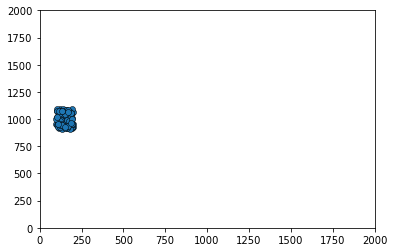

In [5]:
figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))

scatter = axes.scatter(original_positions[0, :], original_positions[1, :],
                       marker='o', edgecolor='k', lw=0.5)

scatter

### Produce animated behaviour 

In [6]:
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

In [7]:
def update_boids(positions, velocities):
    
    ### Fly towards the middle
    move_to_middle_strength = 0.01
    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, np.newaxis]
    velocities -= direction_to_middle * move_to_middle_strength

    ### Avoiding collisions
    separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    alert_distance = 100
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)

    ### Match speed with nearby close_birds
    velocity_differences = velocities[:, np.newaxis, :] - velocities[:, :, np.newaxis]
    formation_flying_distance = 10000
    formation_flying_strength = 0.125
    very_far = square_distances > formation_flying_distance
    velocity_differences_if_close = np.copy(velocity_differences)
    velocity_differences_if_close[0, :, :][very_far] = 0
    velocity_differences_if_close[1, :, :][very_far] = 0
    velocities -= np.mean(velocity_differences_if_close, 1) * formation_flying_strength

    positions += velocities


In [8]:
positions = original_positions.copy()
velocities = original_velocities.copy()

anim = animation.FuncAnimation(figure, animate, frames=200, interval=50)

HTML(anim.to_jshtml())